In [ ]:
## stage 3 hackbio: building a ML model to predict the IC50


In [ ]:
! pip install chembl-webresource-cleint
! pip install rdkit-pypi
! pip install mordred

ERROR: Could not find a version that satisfies the requirement chembl-webresource-cleint (from versions: none)
ERROR: No matching distribution found for chembl-webresource-cleint
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.8 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=3625aea724a7a689801476d8a1b69b249b3042738f79b1af62916f6078d5ebed
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [ ]:
! pip install chembl-webresource-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
# import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors

In [ ]:
## uploading my target
my_target = new_client.target
target_query = my_target.search('methionine')


In [ ]:
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'A6H5Y3', 'xref_name': None, 'xre...",Mus musculus,Methionine synthase,15.0,False,CHEMBL3188,"[{'accession': 'A6H5Y3', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Bos taurus,Mitochondrial peptide methionine sulfoxide red...,15.0,False,CHEMBL2007622,"[{'accession': 'P54149', 'component_descriptio...",SINGLE PROTEIN,9913
2,[],Homo sapiens,Methionine synthase,15.0,False,CHEMBL2150844,"[{'accession': 'Q99707', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Rattus norvegicus,Mitochondrial peptide methionine sulfoxide red...,15.0,False,CHEMBL3509605,"[{'accession': 'Q923M1', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Trypanosoma brucei brucei (strain 927/4 GUTat1...,"Methionyl-tRNA synthetase, putative",14.0,False,CHEMBL2146303,"[{'accession': 'Q38C91', 'component_descriptio...",SINGLE PROTEIN,999953
5,"[{'xref_id': 'P0AE18', 'xref_name': None, 'xre...",Escherichia coli K-12,Methionine aminopeptidase,13.0,False,CHEMBL3423,"[{'accession': 'P0AE18', 'component_descriptio...",SINGLE PROTEIN,83333
6,"[{'xref_id': 'P13444', 'xref_name': None, 'xre...",Rattus norvegicus,S-adenosylmethionine synthetase alpha and beta...,13.0,False,CHEMBL2195,"[{'accession': 'P13444', 'component_descriptio...",SINGLE PROTEIN,10116
7,"[{'xref_id': 'P18298', 'xref_name': None, 'xre...",Rattus norvegicus,S-adenosylmethionine synthetase gamma form,13.0,False,CHEMBL2838,"[{'accession': 'P18298', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'P56218', 'xref_name': None, 'xre...",Pyrococcus furiosus (strain ATCC 43587 / DSM 3...,Methionine aminopeptidase,13.0,False,CHEMBL4857,"[{'accession': 'P56218', 'component_descriptio...",SINGLE PROTEIN,186497
9,[],Rattus norvegicus,S-adenosylmethionine synthetase (MAT 1 and MAT 2),13.0,False,CHEMBL2111450,"[{'accession': 'P13444', 'component_descriptio...",PROTEIN FAMILY,10116


In [ ]:
seleceted_target = targets.target_chembl_id[16]
seleceted_target

'CHEMBL3922'

In [ ]:
## isolate the ic50 from the activity
activity = new_client.activity
res = activity.filter(target_chembl_id=seleceted_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head(5)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,439974,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,53.6
1,None,None,463563,[],CHEMBL709688,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,None,470405,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,1.0
3,None,None,788731,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,46.0
4,None,None,789751,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,158.0


In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-11-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,439974,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,53.6
1,None,None,463563,[],CHEMBL709688,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,None,470405,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,1.0
3,None,None,788731,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,46.0
4,None,None,789751,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24661916,[],CHEMBL5096746,Inhibition of human MetAP2,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,43.0
1019,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24662111,[],CHEMBL5096877,Inhibition of HuMetAP2 using Met-Pro-pNA as su...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,7.0
1020,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24954354,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5210472,Affinity Biochemical interaction (Biochemical ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,7.0
1021,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24988978,[],CHEMBL5229099,Inhibition of human MetAP2,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,112.2


In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,439974,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,53.6
1,None,None,463563,[],CHEMBL709688,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,8.0
2,None,None,470405,[],CHEMBL709685,In vitro inhibitory activity against purified ...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,1.0
3,None,None,788731,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,46.0
4,None,None,789751,[],CHEMBL716774,In vitro inhibition of human recombinant Methi...,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,None,Active,23371402,[],CHEMBL4883187,Biochemical activity-MetAP2 using Co,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,nM,UO_0000065,None,37.0
1016,None,Not Active,23371406,[],CHEMBL4883187,Biochemical activity-MetAP2 using Co,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,50.0
1018,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24661916,[],CHEMBL5096746,Inhibition of human MetAP2,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,43.0
1021,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24988978,[],CHEMBL5229099,Inhibition of human MetAP2,B,None,None,BAO_0000190,...,Homo sapiens,Methionine aminopeptidase 2,9606,None,None,IC50,uM,UO_0000065,None,112.2


In [ ]:
# select the id , smiles and ic50
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,53600.0
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,8000.0
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,1.0
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,46.0
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,158.0
...,...,...,...
1015,CHEMBL4456585,O=C(NNS(=O)(=O)c1ccccc1F)c1cc(F)cc(-c2ccccn2)c1,37.0
1016,CHEMBL4446366,O=C(NNS(=O)(=O)c1ccccc1)c1cc(-c2ccnnc2)ccc1F,50000.0
1018,CHEMBL5207825,COc1ccc(Cn2nnc3c2[C@]2(CC[C@@H]3OC(=O)NC(C)C)C...,43000.0
1021,CHEMBL139938,Oc1c(Br)cc(Cl)c2cccnc12,112200.0


In [ ]:
# classify the bioactivity
bioactivity_class = []
for i in df3.standard_value:
      if float(i) >= 10000:
        bioactivity_class.append("inactive")
      elif float(i) <= 1000:
        bioactivity_class.append("active")
      else:
        bioactivity_class.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivty_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,53600.0,inactive
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,8000.0,intermediate
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,1.0,active
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,46.0,active
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,158.0,active
...,...,...,...,...
608,NaN,NaN,NaN,active
609,NaN,NaN,NaN,active
683,NaN,NaN,NaN,active
684,NaN,NaN,NaN,active


In [ ]:
## calculate libinski descripters
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(smiles, verbose=False):
    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [ ]:
df_lipinski = lipinski(df4.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,298.379,1.2161,2.0,5.0
1,296.363,1.4243,1.0,5.0
2,458.551,3.9154,1.0,6.0
3,457.596,3.5071,4.0,6.0
4,549.624,3.6324,4.0,8.0
...,...,...,...,...
740,389.383,2.6501,2.0,4.0
741,372.381,1.9060,2.0,5.0
742,372.425,2.5300,1.0,7.0
743,258.502,3.3563,1.0,2.0


In [ ]:
# combined df4 and df_lipinski
df_combined = pd.concat([df4,df_lipinski], axis=1)
df_combined.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,53600.0,inactive,298.379,1.2161,2.0,5.0
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,8000.0,intermediate,296.363,1.4243,1.0,5.0
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,1.0,active,458.551,3.9154,1.0,6.0
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,46.0,active,457.596,3.5071,4.0,6.0
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,158.0,active,549.624,3.6324,4.0,8.0


In [ ]:
# describe
df_combined.standard_value.describe()

,standard_value
count,745
unique,479
top,100000.0
freq,15


In [ ]:
# convert ic50 to pIC50
def pIC50(input):
    pIC50 = []
    for i in input['standard_value']:
        try:  # this will try to convert i to float
          i = float(i)
        except ValueError: # if i isnt a number ,set molar to 0
          molar = 0
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', axis = 1)

    return x

In [ ]:
# cobined togather and call it df_final
df_final = pIC50(df_combined)
df_final

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,inactive,298.379,1.2161,2.0,5.0,4.270835
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,intermediate,296.363,1.4243,1.0,5.0,5.096910
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,active,458.551,3.9154,1.0,6.0,9.000000
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,active,457.596,3.5071,4.0,6.0,7.337242
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,active,549.624,3.6324,4.0,8.0,6.801343
...,...,...,...,...,...,...,...,...
608,NaN,NaN,active,507.472,4.8283,2.0,6.0,NaN
609,NaN,NaN,active,491.473,5.2443,2.0,5.0,NaN
683,NaN,NaN,active,330.409,1.5748,2.0,4.0,NaN
684,NaN,NaN,active,330.409,1.5748,2.0,4.0,NaN


In [ ]:
df_cleaned = df_final.dropna()
df_cleaned

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,inactive,298.379,1.2161,2.0,5.0,4.270835
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,intermediate,296.363,1.4243,1.0,5.0,5.096910
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,active,458.551,3.9154,1.0,6.0,9.000000
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,active,457.596,3.5071,4.0,6.0,7.337242
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,active,549.624,3.6324,4.0,8.0,6.801343
...,...,...,...,...,...,...,...,...
740,CHEMBL3927933,O=c1c2cn[nH]c2c2ccc(-c3ccc(N4CCOCC4)nc3)cc2n1C...,active,389.383,2.6501,2.0,4.0,7.539102
741,CHEMBL3899944,CCn1c(=O)c2cn[nH]c2c2ccc(-c3ccc(OCCCN(C)C)nc3)...,inactive,372.381,1.9060,2.0,5.0,7.512862
742,CHEMBL3908851,CCn1c(=O)c2cn[nH]c2c2ccc(-c3cccc4cccnc34)cc21,inactive,372.425,2.5300,1.0,7.0,7.447332
743,CHEMBL3982290,O=c1c2c[nH]nc2c2ccc(-c3cccc(Cl)n3)cc2n1CC(F)(F)F,inactive,258.502,3.3563,1.0,2.0,7.379864


In [ ]:
#subset the pIC50
pIC = df_final[("pIC50")]

In [ ]:
df_cleaned.pIC50.describe()

,pIC50
count,509.000000
mean,6.258790
std,1.246425
min,3.522879
25%,5.259637
50%,6.309804
75%,7.207608
max,9.408935


In [ ]:
# see how the data looks like
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

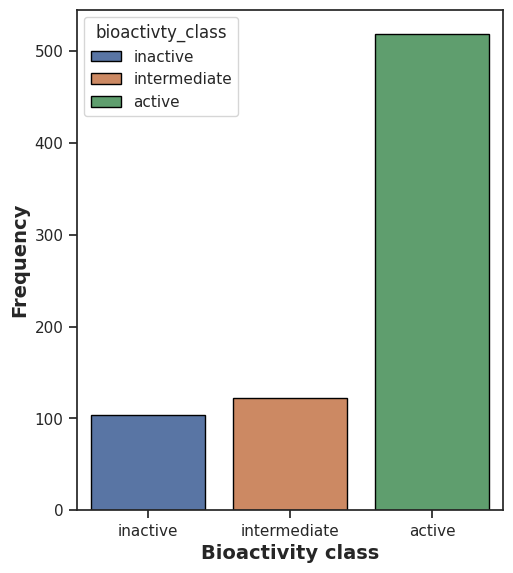

In [ ]:
plt.figure(figsize=(5.5, 6.5))

# Check if the column name is 'class' or 'bioactivity_class'
sns.countplot(x='bioactivty_class', data=df_final, edgecolor='black', hue = 'bioactivty_class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('pfht1_plot_bioactivity_class.pdf')

Text(0, 0.5, 'Frequency')

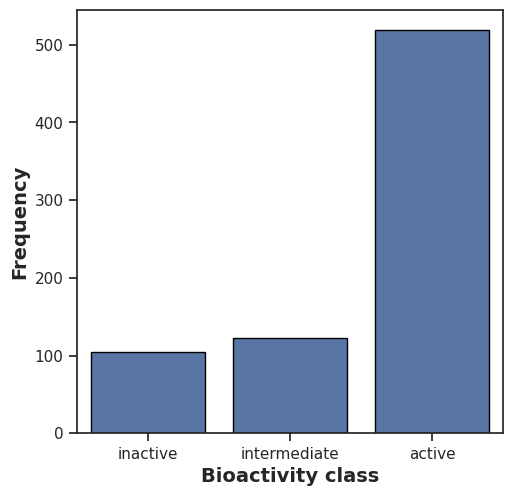

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivty_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')


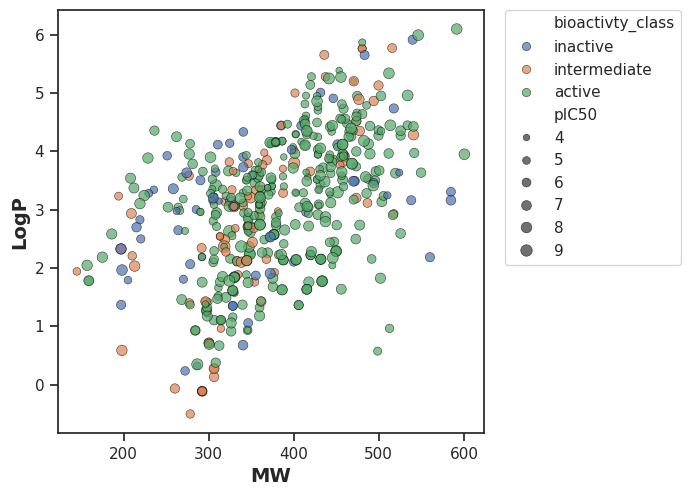

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivty_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

In [ ]:
#subset the pIC50
pIC = df_final[("pIC50")]

In [ ]:
def canonical_smiles(smiles):
    mol = [Chem.MolFromSmiles(i) for i in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mol]
    return smiles

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

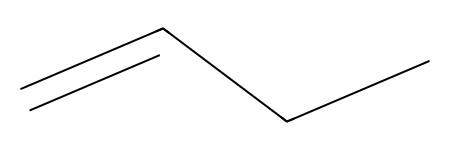

In [ ]:
Chem.MolFromSmiles('C=CCC')

In [ ]:
## getting molecular descriptors
def RDKit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:#add hydrogen to molecules
        mol = Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [ ]:
df_cleaned.head(5)

,molecule_chembl_id,canonical_smiles,bioactivty_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL325412,CO[C@@H]1[C@H](O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)...,inactive,298.379,1.2161,2.0,5.0,4.270835
1,CHEMBL116441,CO[C@@H]1C(=O)CC[C@](O)(C=O)[C@H]1[C@@]1(C)O[C...,intermediate,296.363,1.4243,1.0,5.0,5.096910
2,CHEMBL32838,CO[C@@H]1[C@H](OC(=O)/C=C/C=C/C=C/C=C/C(=O)O)C...,active,458.551,3.9154,1.0,6.0,9.000000
3,CHEMBL322528,CCOc1ccc(/C=C/C(=O)Nc2ccc(NC(=O)[C@@H](O)[C@H]...,active,457.596,3.5071,4.0,6.0,7.337242
4,CHEMBL322131,COc1cc(NC(=O)/C=C/c2cc(OC)c(OC)c(OC)c2)ccc1NC(...,active,549.624,3.6324,4.0,8.0,6.801343


In [ ]:
MoleculeDescriptors,desc_names = RDKit_descriptors(df_cleaned.canonical_smiles)

In [ ]:
df_with_200_descriptors = pd.DataFrame(MoleculeDescriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.067968,-5.193808,13.067968,2.064180,0.453050,298.379,272.171,298.178024,120,0,...,0,0,0,0,0,0,0,0,0,0
1,13.495102,-5.074479,13.495102,2.039415,0.471610,296.363,272.171,296.162374,118,0,...,0,0,0,0,0,0,0,0,0,0
2,13.748839,-5.346380,13.748839,1.516956,0.174199,458.551,424.279,458.230453,180,0,...,0,0,0,0,0,0,0,0,0,0
3,13.736254,-4.606348,13.736254,0.572341,0.286528,457.596,426.348,457.203527,172,0,...,1,0,0,0,0,0,0,0,0,0
4,14.251387,-4.810205,14.251387,0.754945,0.236974,549.624,514.344,549.247500,212,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,14.097400,-5.906984,14.097400,0.038801,0.540756,429.402,411.258,429.141259,160,0,...,0,0,0,0,0,0,0,0,0,0
505,13.668697,-4.262698,13.668697,0.118196,0.489391,391.475,366.275,391.200825,150,0,...,0,0,0,0,0,0,0,0,0,0
506,13.621331,-3.588598,13.621331,0.021968,0.525795,340.386,324.258,340.132411,126,0,...,0,0,0,0,0,0,0,0,0,0
507,13.792262,-5.741697,13.792262,0.057712,0.532741,378.741,368.661,378.049523,132,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fp_pIC = pd.concat([df_with_200_descriptors, df_lipinski, pIC], axis=1)

In [ ]:
fp_pIC.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,13.067968,-5.193808,13.067968,2.064180,0.453050,298.379,272.171,298.178024,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,298.379,1.2161,2.0,5.0,4.270835
1,13.495102,-5.074479,13.495102,2.039415,0.471610,296.363,272.171,296.162374,118.0,0.0,...,0.0,0.0,0.0,0.0,0.0,296.363,1.4243,1.0,5.0,5.096910
2,13.748839,-5.346380,13.748839,1.516956,0.174199,458.551,424.279,458.230453,180.0,0.0,...,0.0,0.0,0.0,0.0,0.0,458.551,3.9154,1.0,6.0,9.000000
3,13.736254,-4.606348,13.736254,0.572341,0.286528,457.596,426.348,457.203527,172.0,0.0,...,0.0,0.0,0.0,0.0,0.0,457.596,3.5071,4.0,6.0,7.337242
4,14.251387,-4.810205,14.251387,0.754945,0.236974,549.624,514.344,549.247500,212.0,0.0,...,0.0,0.0,0.0,0.0,0.0,549.624,3.6324,4.0,8.0,6.801343


In [ ]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.drop('MW', axis=1)

In [ ]:
fp_pIC

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50
0,13.067968,-5.193808,13.067968,2.064180,0.453050,298.379,272.171,298.178024,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.2161,2.0,5.0,4.270835
1,13.495102,-5.074479,13.495102,2.039415,0.471610,296.363,272.171,296.162374,118.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.4243,1.0,5.0,5.096910
2,13.748839,-5.346380,13.748839,1.516956,0.174199,458.551,424.279,458.230453,180.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.9154,1.0,6.0,9.000000
3,13.736254,-4.606348,13.736254,0.572341,0.286528,457.596,426.348,457.203527,172.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.5071,4.0,6.0,7.337242
4,14.251387,-4.810205,14.251387,0.754945,0.236974,549.624,514.344,549.247500,212.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.6324,4.0,8.0,6.801343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.431798
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.301030
1018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.366532
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.950007


In [ ]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), you can drop one
fp_pIC = fp_pIC.dropna()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ensure both X and y have the same number of samples
fp_pIC = fp_pIC.reset_index(drop=True)
df_cleaned = df_cleaned.reset_index(drop=True)

X = fp_pIC[fp_pIC.index.isin(df_cleaned.index)]  # Use df_with_200_descriptors as features
y = df_cleaned[df_cleaned.index.isin(fp_pIC.index)].pIC50

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ... (Your existing code for data preparation and model training)

# Evaluate performance with more metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

MSE: 0.0504
RMSE: 0.2245
MAE: 0.0952
R-squared: 0.9647
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
## PREPARING MY LIGANDS DATASETS TO BE PREDICTED BY THE MODEL
import pandas as pd

# Try reading the file with 'latin-1' encoding
df_ligands = pd.read_csv('ligands with smiles.csv', encoding='latin-1')

In [ ]:
df_ligands.head()

,No,Ligands,SMILES
0,1.,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...
1,NaN,NaN,NaN
2,2.,Demethoxycurcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C...
3,NaN,NaN,NaN
4,3.,Bisdemethoxycurcumin,C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O


In [ ]:
df_ligands

,No,Ligands,SMILES
0,1.,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...
1,NaN,NaN,NaN
2,2.,Demethoxycurcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C...
3,NaN,NaN,NaN
4,3.,Bisdemethoxycurcumin,C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O
...,...,...,...
57,47.,Curcumenone,CC(=C1C[C@@H]2[C@H]([C@@]2(CC1=O)C)CCC(=O)C)C
58,48.,Procurcumenol,CC1=CC(=O)C(=C(C)C)C[C@H]2[C@H]1CC[C@]2(C)O
59,49.,Dehydrocurdione,CC1CC/C=C(\CC(=O)C(=C(C)C)CC1=O)/C
60,50.,Curcumanolide A,CC1CCC(C12CC(=C(C)C)C(=O)O2)C(=C)C


In [ ]:
print(df_ligands.columns)

Index(['No', 'Ligands', 'SMILES '], dtype='object')


In [ ]:
df_ligands = df_ligands.drop('No', axis=1)

In [ ]:
df_ligands

,Ligands,SMILES
0,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...
1,NaN,NaN
2,Demethoxycurcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C...
3,NaN,NaN
4,Bisdemethoxycurcumin,C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O
...,...,...
57,Curcumenone,CC(=C1C[C@@H]2[C@H]([C@@]2(CC1=O)C)CCC(=O)C)C
58,Procurcumenol,CC1=CC(=O)C(=C(C)C)C[C@H]2[C@H]1CC[C@]2(C)O
59,Dehydrocurdione,CC1CC/C=C(\CC(=O)C(=C(C)C)CC1=O)/C
60,Curcumanolide A,CC1CCC(C12CC(=C(C)C)C(=O)O2)C(=C)C


In [ ]:
df_ligands.dropna()

,Ligands,SMILES
0,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...
2,Demethoxycurcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C...
4,Bisdemethoxycurcumin,C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O
6,Tetrahydrocurcumin,COC1=C(C=CC(=C1)CCC(=O)CC(=O)CCC2=CC(=C(C=C2)O...
8,(+/-)-ar-Turmerone,CC1=CC=C(C=C1)C(C)CC(=O)C=C(C)C
9,Curlone,CC(CC(=O)C=C(C)C)C1CCC(=C)C=C1
11,Zingiberene,CC1=CC[C@@H](C=C1)[C@@H](C)CCC=C(C)C
12,Curcumenol,C[C@H]1CC[C@@H]2[C@]13CC(=C(C)C)[C@](O3)(C=C2C)O
13,Curdione,C[C@H]1CC/C=C(/CC(=O)[C@@H](CC1=O)C(C)C)\C
14,Curcumadiol,CC(C)C1=CCC(C2CCC(C2C1)(C)O)(C)O


In [ ]:
df_ligands.drop_duplicates()

,Ligands,SMILES
0,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...
1,NaN,NaN
2,Demethoxycurcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C...
4,Bisdemethoxycurcumin,C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O
6,Tetrahydrocurcumin,COC1=C(C=CC(=C1)CCC(=O)CC(=O)CCC2=CC(=C(C=C2)O...
8,(+/-)-ar-Turmerone,CC1=CC=C(C=C1)C(C)CC(=O)C=C(C)C
9,Curlone,CC(CC(=O)C=C(C)C)C1CCC(=C)C=C1
11,Zingiberene,CC1=CC[C@@H](C=C1)[C@@H](C)CCC=C(C)C
12,Curcumenol,C[C@H]1CC[C@@H]2[C@]13CC(=C(C)C)[C@](O3)(C=C2C)O
13,Curdione,C[C@H]1CC/C=C(/CC(=O)[C@@H](CC1=O)C(C)C)\C


In [ ]:
df_ligands.describe()

,Ligands,SMILES
count,51,51
unique,51,51
top,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...
freq,1,1


In [ ]:
## calculate libinski descripters for the ligands
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(SMILES, verbose=False):
    moldata= []
    for elem in SMILES:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors

In [ ]:
df_ligands.columns

Index(['Ligands', 'SMILES '], dtype='object')

In [ ]:
df_ligands_lipinski = lipinski(df_ligands['SMILES '])
df_ligands_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,368.385,3.36990,2.0,6.0
1,338.359,3.36130,2.0,5.0
2,308.333,3.35270,2.0,4.0
3,372.417,3.20870,2.0,6.0
4,216.324,4.02392,0.0,1.0
5,218.340,4.07030,0.0,1.0
6,204.357,4.89130,0.0,0.0
7,234.339,3.17650,1.0,2.0
8,236.355,3.55320,0.0,2.0
9,238.371,2.89080,2.0,2.0


In [ ]:
# combined df_ligands and df_ligands_lipinski
df_combination = pd.concat([df_ligands,df_ligands_lipinski], axis=1)
df_combination.head(5)

,Ligands,SMILES,MW,LogP,NumHDonors,NumHAcceptors
0,Curcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,368.385,3.36990,2.0,6.0
1,NaN,NaN,338.359,3.36130,2.0,5.0
2,Demethoxycurcumin,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C...,308.333,3.35270,2.0,4.0
3,NaN,NaN,372.417,3.20870,2.0,6.0
4,Bisdemethoxycurcumin,C1=CC(=CC=C1/C=C/C(=O)CC(=O)/C=C/C2=CC=C(C=C2)O)O,216.324,4.02392,0.0,1.0


In [ ]:
## getting ligands molecular descriptors
def RDKit_descriptors(SMILES ):
    mols = [Chem.MolFromSmiles(i) for i in SMILES ]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:#add hydrogen to molecules
        mol = Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

In [ ]:
!pip install rdkit-pypi
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

## getting ligands molecular descriptors
def RDKit_descriptors(SMILES ):
    mols = [Chem.MolFromSmiles(i) for i in SMILES if i is not None and isinstance(i, str)] # Added a check to ensure that only valid SMILES strings are processed.
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:#add hydrogen to molecules
        if mol is not None: # Check to ensure that mol is not None before proceeding.
            mol = Chem.AddHs(mol)
            descriptors = calc.CalcDescriptors(mol)
            Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names




MoleculeDescriptors_list, desc_names = RDKit_descriptors(df_ligands['SMILES '])

[11:18:35] SMILES Parse Error: syntax error while parsing: nan
[11:18:35] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[11:18:35] SMILES Parse Error: syntax error while parsing: nan
[11:18:35] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[11:18:35] SMILES Parse Error: syntax error while parsing: nan
[11:18:35] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[11:18:35] SMILES Parse Error: syntax error while parsing: nan
[11:18:35] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[11:18:35] SMILES Parse Error: syntax error while parsing: nan
[11:18:35] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[11:18:35] SMILES Parse Error: syntax error while parsing: nan
[11:18:35] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[11:18:35] SMILES Parse Error: syntax error while parsing: nan
[11:18:35] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[11:18:35] SMILES Parse Err

In [ ]:
df_ligands_descriptors = pd.DataFrame(MoleculeDescriptors_list,columns=desc_names) # Changed MoleculeDescriptors to MoleculeDescriptors_list
df_ligands_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.013668,-4.000379,13.013668,1.059160,0.548123,368.385,348.225,368.125988,140,0,...,0,0,0,0,0,0,0,0,0,0
1,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,320.215,338.115424,128,0,...,0,0,0,0,0,0,0,0,0,0
2,12.755055,-3.822254,12.755055,0.825560,0.633680,308.333,292.205,308.104859,116,0,...,0,0,0,0,0,0,0,0,0,0
3,13.415618,-4.624453,13.415618,1.234625,0.622267,372.417,348.225,372.157288,144,0,...,0,0,0,0,0,0,0,0,0,0
4,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,196.164,216.151415,86,0,...,0,0,0,0,0,0,0,0,0,0
5,13.127515,-4.651828,13.127515,1.441369,0.649992,218.340,196.164,218.167065,88,0,...,0,0,0,0,0,0,0,0,0,0
6,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,0,0,0
7,9.101441,-4.348142,9.101441,1.833364,0.652275,234.339,212.163,234.161980,94,0,...,0,0,0,0,0,0,0,0,0,0
8,13.783254,-5.244496,13.783254,2.404922,0.652363,236.355,212.163,236.177630,96,0,...,0,0,0,0,0,0,0,0,0,0
9,9.278750,-5.100463,9.278750,2.461520,0.689600,238.371,212.163,238.193280,98,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# compine the lipinski and the discreptors
fp_ligands = pd.concat([df_ligands_descriptors, df_ligands_lipinski,], axis=1)

In [ ]:
fp_ligands

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,MW,LogP,NumHDonors,NumHAcceptors
0,13.013668,-4.000379,13.013668,1.059160,0.548123,368.385,348.225,368.125988,140,0,...,0,0,0,0,0,0,368.385,3.36990,2.0,6.0
1,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,320.215,338.115424,128,0,...,0,0,0,0,0,0,338.359,3.36130,2.0,5.0
2,12.755055,-3.822254,12.755055,0.825560,0.633680,308.333,292.205,308.104859,116,0,...,0,0,0,0,0,0,308.333,3.35270,2.0,4.0
3,13.415618,-4.624453,13.415618,1.234625,0.622267,372.417,348.225,372.157288,144,0,...,0,0,0,0,0,0,372.417,3.20870,2.0,6.0
4,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,196.164,216.151415,86,0,...,0,0,0,0,0,0,216.324,4.02392,0.0,1.0
5,13.127515,-4.651828,13.127515,1.441369,0.649992,218.340,196.164,218.167065,88,0,...,0,0,0,0,0,0,218.340,4.07030,0.0,1.0
6,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,204.357,4.89130,0.0,0.0
7,9.101441,-4.348142,9.101441,1.833364,0.652275,234.339,212.163,234.161980,94,0,...,0,0,0,0,0,0,234.339,3.17650,1.0,2.0
8,13.783254,-5.244496,13.783254,2.404922,0.652363,236.355,212.163,236.177630,96,0,...,0,0,0,0,0,0,236.355,3.55320,0.0,2.0
9,9.278750,-5.100463,9.278750,2.461520,0.689600,238.371,212.163,238.193280,98,0,...,0,0,0,0,0,0,238.371,2.89080,2.0,2.0


In [ ]:
# the Molecular is now in duplicate, one from Lipinski df (MW) and the other from the molecular descriptor (MolWt), drop one
fp_ligands = fp_ligands.drop('MW', axis=1)
fp_ligands

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors
0,13.013668,-4.000379,13.013668,1.059160,0.548123,368.385,348.225,368.125988,140,0,...,0,0,0,0,0,0,0,3.36990,2.0,6.0
1,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,320.215,338.115424,128,0,...,0,0,0,0,0,0,0,3.36130,2.0,5.0
2,12.755055,-3.822254,12.755055,0.825560,0.633680,308.333,292.205,308.104859,116,0,...,0,0,0,0,0,0,0,3.35270,2.0,4.0
3,13.415618,-4.624453,13.415618,1.234625,0.622267,372.417,348.225,372.157288,144,0,...,0,0,0,0,0,0,0,3.20870,2.0,6.0
4,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,196.164,216.151415,86,0,...,0,0,0,0,0,0,0,4.02392,0.0,1.0
5,13.127515,-4.651828,13.127515,1.441369,0.649992,218.340,196.164,218.167065,88,0,...,0,0,0,0,0,0,0,4.07030,0.0,1.0
6,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,4.89130,0.0,0.0
7,9.101441,-4.348142,9.101441,1.833364,0.652275,234.339,212.163,234.161980,94,0,...,0,0,0,0,0,0,0,3.17650,1.0,2.0
8,13.783254,-5.244496,13.783254,2.404922,0.652363,236.355,212.163,236.177630,96,0,...,0,0,0,0,0,0,0,3.55320,0.0,2.0
9,9.278750,-5.100463,9.278750,2.461520,0.689600,238.371,212.163,238.193280,98,0,...,0,0,0,0,0,0,0,2.89080,2.0,2.0


In [ ]:
fp_ligands =fp_ligands.dropna()

In [ ]:
fp_ligands

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors
0,13.013668,-4.000379,13.013668,1.059160,0.548123,368.385,348.225,368.125988,140,0,...,0,0,0,0,0,0,0,3.36990,2.0,6.0
1,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,320.215,338.115424,128,0,...,0,0,0,0,0,0,0,3.36130,2.0,5.0
2,12.755055,-3.822254,12.755055,0.825560,0.633680,308.333,292.205,308.104859,116,0,...,0,0,0,0,0,0,0,3.35270,2.0,4.0
3,13.415618,-4.624453,13.415618,1.234625,0.622267,372.417,348.225,372.157288,144,0,...,0,0,0,0,0,0,0,3.20870,2.0,6.0
4,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,196.164,216.151415,86,0,...,0,0,0,0,0,0,0,4.02392,0.0,1.0
5,13.127515,-4.651828,13.127515,1.441369,0.649992,218.340,196.164,218.167065,88,0,...,0,0,0,0,0,0,0,4.07030,0.0,1.0
6,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,0,0,4.89130,0.0,0.0
7,9.101441,-4.348142,9.101441,1.833364,0.652275,234.339,212.163,234.161980,94,0,...,0,0,0,0,0,0,0,3.17650,1.0,2.0
8,13.783254,-5.244496,13.783254,2.404922,0.652363,236.355,212.163,236.177630,96,0,...,0,0,0,0,0,0,0,3.55320,0.0,2.0
9,9.278750,-5.100463,9.278750,2.461520,0.689600,238.371,212.163,238.193280,98,0,...,0,0,0,0,0,0,0,2.89080,2.0,2.0


In [ ]:
fp_ligands.describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,...,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.000000,51.000000,51.000000
mean,10.311898,-4.225606,10.311898,1.689266,0.574154,214.037882,193.877882,213.873814,85.647059,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.477418,0.588235,1.607843
std,2.401638,0.491538,2.401638,0.698886,0.110441,73.402830,71.396679,73.355045,27.028003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.806784,0.753033,1.887627
min,7.389583,-5.244496,7.389583,0.629498,0.393233,84.162000,72.066000,84.093900,36.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.400800,0.000000,0.000000
25%,8.406250,-4.636937,8.406250,1.231290,0.479836,154.253000,136.109000,154.135765,64.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.998700,0.000000,0.000000
50%,9.050926,-4.281826,9.050926,1.526505,0.575260,216.324000,196.164000,216.151415,86.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.369900,0.000000,1.000000
75%,13.088836,-3.873148,13.088836,2.018898,0.651133,234.339000,212.163000,234.161980,94.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.015060,1.000000,2.000000
max,13.783254,-2.897318,13.783254,4.039583,0.836195,396.439000,372.247000,396.157288,152.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.035400,2.000000,7.000000


In [ ]:
fp_ligands['predicted_pIC50'] = model.predict(fp_ligands.drop('pIC50', axis=1)) # Predict using the dataframe without the 'pIC50' column

In [ ]:
fp_ligands['predicted_pIC50']

,predicted_pIC50
0,6.196670
1,5.920423
2,5.917196
3,6.258368
4,6.411741
5,6.531597
6,6.614579
7,6.570179
8,6.364506
9,6.447328


In [ ]:
fp_ligands

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,LogP,NumHDonors,NumHAcceptors,pIC50,predicted_pIC50
0,13.013668,-4.000379,13.013668,1.059160,0.548123,368.385,348.225,368.125988,140,0,...,0,0,0,0,0,3.36990,2.0,6.0,0,6.196670
1,12.909481,-3.911317,12.909481,0.851868,0.597270,338.359,320.215,338.115424,128,0,...,0,0,0,0,0,3.36130,2.0,5.0,0,5.920423
2,12.755055,-3.822254,12.755055,0.825560,0.633680,308.333,292.205,308.104859,116,0,...,0,0,0,0,0,3.35270,2.0,4.0,0,5.917196
3,13.415618,-4.624453,13.415618,1.234625,0.622267,372.417,348.225,372.157288,144,0,...,0,0,0,0,0,3.20870,2.0,6.0,0,6.258368
4,12.988293,-4.246962,12.988293,1.172041,0.694542,216.324,196.164,216.151415,86,0,...,0,0,0,0,0,4.02392,0.0,1.0,0,6.411741
5,13.127515,-4.651828,13.127515,1.441369,0.649992,218.340,196.164,218.167065,88,0,...,0,0,0,0,0,4.07030,0.0,1.0,0,6.531597
6,8.691928,-4.655905,8.691928,1.453699,0.571804,204.357,180.165,204.187801,84,0,...,0,0,0,0,0,4.89130,0.0,0.0,0,6.614579
7,9.101441,-4.348142,9.101441,1.833364,0.652275,234.339,212.163,234.161980,94,0,...,0,0,0,0,0,3.17650,1.0,2.0,0,6.570179
8,13.783254,-5.244496,13.783254,2.404922,0.652363,236.355,212.163,236.177630,96,0,...,0,0,0,0,0,3.55320,0.0,2.0,0,6.364506
9,9.278750,-5.100463,9.278750,2.461520,0.689600,238.371,212.163,238.193280,98,0,...,0,0,0,0,0,2.89080,2.0,2.0,0,6.447328


In [ ]:
import pandas as pd

fp_ligands[['predicted_pIC50']].to_csv('predicted_pIC50.csv', index=False)

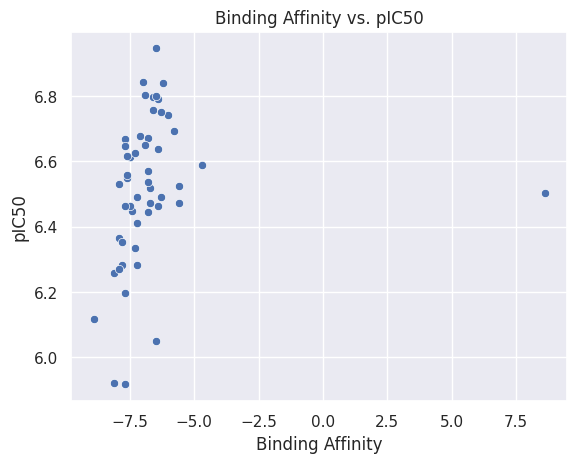

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('plot.csv')

# Create the scatter plot
sns.scatterplot(x='Binding Affinity', y='pIC50', data=df)

# Customize the plot
plt.title('Binding Affinity vs. pIC50')
plt.xlabel('Binding Affinity')
plt.ylabel('pIC50')
plt.grid(True)

# Display the plot
plt.show()